#                                 ML & AI PROJECT

#   Project Name : Handwritten Digit Recognition

In [1]:
import os
import numpy as np
import matplotlib.pyplot as pt
import cv2
import pandas as pd

In [2]:
os.listdir("handwritten")

['digit_0',
 'digit_1',
 'digit_2',
 'digit_3',
 'digit_4',
 'digit_5',
 'digit_6',
 'digit_7',
 'digit_8',
 'digit_9']

In [3]:
loc0 ='handwritten\\digit_0'
loc1='handwritten\\digit_1'
loc2='handwritten\\digit_2'
loc3='handwritten\\digit_3'
loc4='handwritten\\digit_4'
loc5='handwritten\\digit_5'
loc6='handwritten\\digit_6'
loc7='handwritten\\digit_7'
loc8='C:\\Users\\mohdf\\Downloads\\ml al training\\deep learning\\handwritten\\digit_8'
loc9='C:\\Users\\mohdf\\Downloads\\ml al training\\deep learning\\handwritten\\digit_9'

In [5]:
features = []

for i in os.listdir(loc0):
    f = cv2.imread(os.path.join(loc0,i),0)
    fr = cv2.resize(f,(80,80))
    features.append(fr)
    
for i in os.listdir(loc1):
    f = cv2.imread(os.path.join(loc1,i),0)
    fr = cv2.resize(f,(80,80))
    features.append(fr)
    
for i in os.listdir(loc3):
    f = cv2.imread(os.path.join(loc3,i),0)
    fr = cv2.resize(f,(80,80))
    features.append(fr)
    
for i in os.listdir(loc4):
    f = cv2.imread(os.path.join(loc4,i),0)
    fr = cv2.resize(f,(80,80))
    features.append(fr)
    
for i in os.listdir(loc5):
    f = cv2.imread(os.path.join(loc5,i),0)
    fr = cv2.resize(f,(80,80))
    features.append(fr)
    
for i in os.listdir(loc6):
    f = cv2.imread(os.path.join(loc6,i),0)
    fr = cv2.resize(f,(80,80))
    features.append(fr)
    
for i in os.listdir(loc7):
    f = cv2.imread(os.path.join(loc7,i),0)
    fr = cv2.resize(f,(80,80))
    features.append(fr)
    
for i in os.listdir(loc8):
    f = cv2.imread(os.path.join(loc8,i),0)
    fr = cv2.resize(f,(80,80))
    features.append(fr)
    
for i in os.listdir(loc9):
    f = cv2.imread(os.path.join(loc9,i),0)
    fr = cv2.resize(f,(80,80))
    features.append(fr)

In [6]:
X = np.array(features)
X.shape

(6021, 80, 80)

In [7]:
labels = []


for i in os.listdir(loc0):
    labels.append(0)
    
for i in os.listdir(loc1):
    labels.append(1)
    
    
for i in os.listdir(loc3):
    labels.append(3)
    
for i in os.listdir(loc4):
    labels.append(4)
    
for i in os.listdir(loc5):
    labels.append(5)
    
for i in os.listdir(loc6):
    labels.append(6)
    
for i in os.listdir(loc7):
    labels.append(7)
    
for i in os.listdir(loc8):
    labels.append(8)
    
for i in os.listdir(loc9):
    labels.append(9)

In [8]:
Y = np.array(labels)
Y.shape

(6021,)

In [9]:
len(X)

6021

In [10]:
len(Y)

6021

In [11]:
import pandas as pd 
ft = pd.DataFrame(X.reshape(6021,6400))
lt = pd.DataFrame(Y.reshape(6021,1),columns = ['Labels'])
digits = pd.concat((ft,lt),axis='columns')
digits.to_csv('digits.csv')

# RANDOM VISUALIZATION OF HANDWRITTEN DIGITS

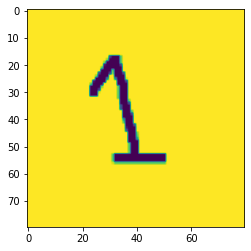

In [13]:
import random 
num=random.randint(0,len(X))
plt.imshow(X[num,:])

In [14]:
X[0,:]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [15]:
cv2.imshow("digit",X[6019,:])
cv2.waitKey(0)

-1

In [18]:
import numpy as np

X = np.array(features).reshape(-1,80,80,1)
Y = np.array(labels)

# Importing CNN libraries

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Convolution2D,MaxPooling2D,Flatten,Dropout
from keras.utils import np_utils

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)


In [21]:
xtrain_n = xtrain/xtrain.max()
xtest_n = xtest/xtest.max()


In [22]:
ytrain_h = np_utils.to_categorical(ytrain)

ytest_h = np_utils.to_categorical(ytest)


# CNN

In [23]:
model = Sequential()
model.add(Convolution2D(32,(3,3), padding = 'same', input_shape = xtrain_n.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Convolution2D(64,(3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Convolution2D(128,(3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Convolution2D(256,(3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Convolution2D(512,(3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Convolution2D(1024,(3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(10,activation='softmax'))


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 80, 80, 32)        320       
                                                                 
 activation (Activation)     (None, 80, 80, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 40, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 40, 40, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 40, 40, 64)        0         
                                                        

In [25]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [26]:
model.fit(xtrain_n,ytrain_h, epochs = 5, validation_data=(xtest_n,ytest_h))

Epoch 1/5
142/142 [==============================] - 132s 924ms/step - loss: 2.1494 - accuracy: 0.1628 - val_loss: 1.8360 - val_accuracy: 0.4409
Epoch 2/5
142/142 [==============================] - 126s 889ms/step - loss: 1.3244 - accuracy: 0.5508 - val_loss: 0.9122 - val_accuracy: 0.7145
Epoch 3/5
142/142 [==============================] - 127s 896ms/step - loss: 0.7810 - accuracy: 0.7513 - val_loss: 0.5738 - val_accuracy: 0.8181
Epoch 4/5
142/142 [==============================] - 128s 898ms/step - loss: 0.4731 - accuracy: 0.8498 - val_loss: 0.4333 - val_accuracy: 0.8599
Epoch 5/5
142/142 [==============================] - 126s 888ms/step - loss: 0.3328 - accuracy: 0.8946 - val_loss: 0.3756 - val_accuracy: 0.8825


# visualization of handwritten digits

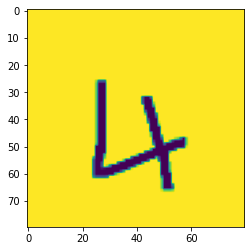

In [63]:
import matplotlib.pyplot as plt
plt.imshow(X[2000].reshape(80,80))
plt.show()

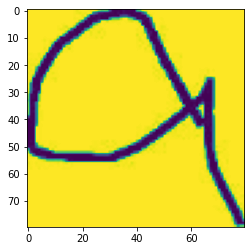

In [66]:
plt.imshow(X[6019].reshape(80,80))
plt.show()

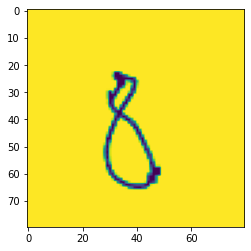

In [31]:
plt.imshow(X[5000].reshape(80,80))
plt.show()

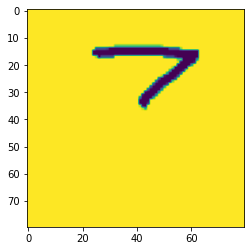

In [34]:
plt.imshow(X[4015].reshape(80,80))
plt.show()

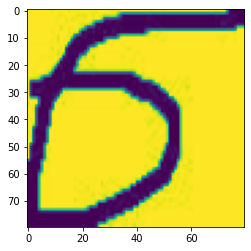

In [35]:
plt.imshow(X[3500].reshape(80,80))
plt.show()

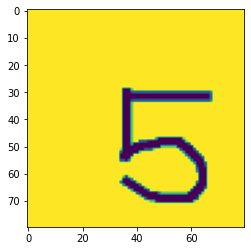

In [36]:
plt.imshow(X[].reshape(80,80))
plt.show()